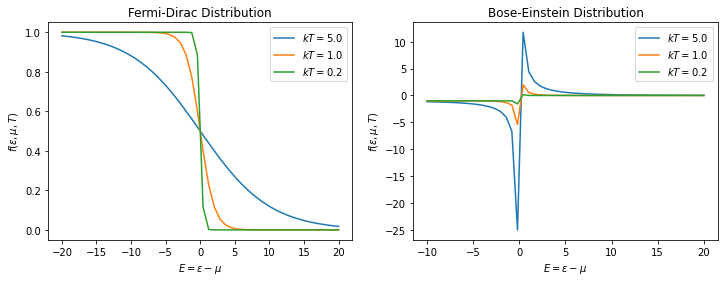

In [1]:
from numpy import exp, linspace
import matplotlib.pyplot as plt

ktvalues = [5.0, 1.0, 0.2];
legarray = [];
legarray2 = [];

fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].set_xlabel('$E=\epsilon-\mu$');
ax[0].set_ylabel('$f(\epsilon, \mu,T)$')
ax[0].set_title('Fermi-Dirac Distribution')
for i in range(0,len(ktvalues)):
    kt = ktvalues[i];
    x =linspace(-20,20);
    f = 1.0/(exp(x/kt)+1);
    legarray.append("$kT=$"+str(kt));
    ax[0].plot(x,f);
ax[0].legend(legarray);

ax[1].set_xlabel('$E=\epsilon-\mu$');
ax[1].set_ylabel('$f(\epsilon, \mu,T)$')
ax[1].set_title('Bose-Einstein Distribution')
for i in range(0,len(ktvalues)):
    kt = ktvalues[i];
    x =linspace(-10,20);
    f = 1.0/(exp(x/kt)-1);
    legarray2.append("$kT=$"+str(kt));
    ax[1].plot(x,f);
ax[1].legend(legarray2);

kT = 1.0


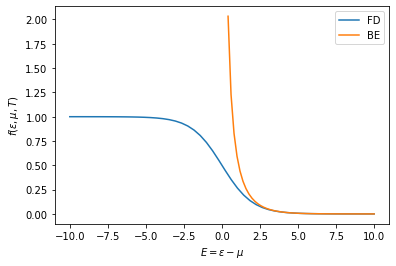

In [2]:
kt = 1.0;
legarray = [];
x =linspace(-10,10);
f = 1.0/(exp(x/kt)+1);
plt.plot(x,f)
legarray.append('FD');
x =linspace(0.4,10);
f = 1.0/(exp(x/kt)-1);
plt.plot(x,f)
legarray.append('BE');
plt.xlabel('$E=\epsilon-\mu$');
plt.ylabel('$f(\epsilon, \mu,T)$')
print('kT = 1.0')
plt.legend(legarray);

$$ n_b=1/(\exp(E/kT)-1) $$

$$ n_a(t)=n_a*\exp((-2L^2t\pi)/O_b)+n_b*(1-\exp((2L^2t\pi)/O_b)) $$

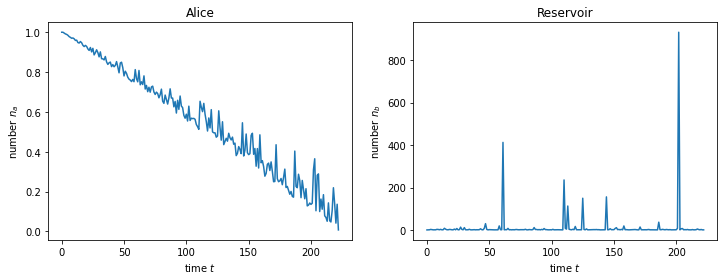

In [3]:
import numpy as np

#initial parameters

O_b = 1.0                    # Omega(k) function dependent on particles/degrees of freedom (k) in the reservoir
L = 1.0                      # constant of interaction between Alice and reservoir R
E = 1.0                      # Total energy in the system
kT = 1.0                     # Reservoir environment 'temperature'
n_a = 1.0                    # Initial P(A=1), Alice for Brexit
n_b = 1./3                   # Initial homogenous environment for anti-Brexit


n_a_total = []
n_b_total = []

# at time t=0,
n_bt = n_b
n_at = n_a


# Evolution over time t
for t in np.arange(0, 1, 0.001):
        
    #Record the change
    n_a_total.append(n_at)
    n_b_total.append(n_bt)
    
    #update n_at based on bagarello 2018
    n_at = (n_a * np.exp(((-2*(L**2)*np.pi*t)/O_b)) + n_bt * (1-np.exp(-((-2*(L**2)*np.pi*t)/O_b))))
    
    #update n_bt based on BE distribution
    E = np.random.uniform(0,1)
    n_bt = 1/(np.exp(E/kT)-1)
    O_b = (n_bt)*2+1
    if n_at < 0:
        break


#plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('Alice')
ax[0].set_xlabel('time $t$')
ax[0].set_ylabel('number $n_a$')
ax[0].plot(n_a_total)
ax[1].set_title('Reservoir')
ax[1].set_xlabel('time $t$')
ax[1].set_ylabel('number $n_b$')
ax[1].plot(n_b_total)